<a href="https://colab.research.google.com/github/dosanchez/data-science-learning/blob/main/exe_chpt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [22]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
y = y.astype(np.uint8)


In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [25]:
y_train_multilabel = (y_train == 0)
print (y_train_multilabel[:2])

for i in range(1,10):
  toadd = (y_train == i)
  y_train_multilabel = np.c_[y_train_multilabel, toadd]

print (y_train_multilabel[:2])

0    False
1     True
Name: class, dtype: bool
[[False False False False False  True False False False False]
 [ True False False False False False False False False False]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

KNeighborsClassifier()

In [27]:
a = knn_clf.predict([X_train.iloc[1]])
print (a)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[ True False False False False False False False False False]]


In [28]:

from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
searh = GridSearchCV(knn_clf, param_grid, cv=4, verbose=3, scoring="f1_macro")
searh.fit(X_train, y_train_multilabel)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END ....n_neighbors=3, weights=uniform;, score=0.972 total time= 1.0min
[CV 2/4] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  54.6s
[CV 3/4] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  55.1s
[CV 4/4] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  54.8s
[CV 1/4] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  45.6s
[CV 2/4] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  48.3s
[CV 3/4] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  45.8s
[CV 4/4] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  47.3s
[CV 1/4] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  54.9s
[CV 2/4] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  54.6s
[CV 3/4] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  54.2s
[CV 4/4] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro', verbose=3)

In [33]:
searh.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [30]:
searh.best_score_

np.float64(0.9716232599093574)

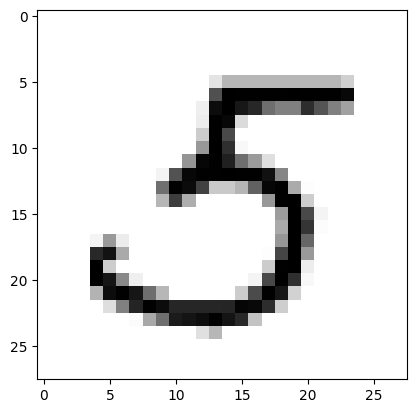

In [34]:
import time
import random
from IPython.display import clear_output
for i in range(10):
  image = random.randint(0, 60000)
  some_digit = X.iloc[image]
  some_digit_image = some_digit.to_numpy().reshape(28, 28)
  plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
  #plt.axis("off")
  plt.show()
  time.sleep(1) # Pause 1 second
  clear_output(wait=True)


In [32]:
for i in range(60000):
  some_digit = X.iloc[i]
  some_digit_image = some_digit.to_numpy().reshape(28, 28)